<a href="https://colab.research.google.com/github/hajirafkhalid2219/AI-VIDYA/blob/main/house_price_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Load data set table and 10 columns

In [ ]:
df = pd.read_csv('/content/Housing.csv')
header = df.columns
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Define data types

In [ ]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
#Convert dat types to numbers
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in binary_cols:
    df[col] = df[col].replace({'yes': 1, 'no': 0})
    df[col]=df[col].replace('unfurnished',0)
    df[col]=df[col].replace('semi-furnished',1)
    df[col]=df[col].replace('furnished',2 )
    print(df.head(10))

      price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000   7420         4          2        3         1          0   
1  12250000   8960         4          4        4         1          0   
2  12250000   9960         3          2        2         1          0   
3  12215000   7500         4          2        2         1          0   
4  11410000   7420         4          1        2         1          1   
5  10850000   7500         3          3        1         1          0   
6  10150000   8580         4          3        4         1          0   
7  10150000  16200         5          3        2         1          0   
8   9870000   8100         4          1        2         1          1   
9   9800000   5750         3          2        4         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3      

In [ ]:
#Data preprocessing
print(df.isnull().sum())
#No cleaning required

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
#Train Test
#This code segment is performs 'train-test split' for your machine learning model. It divides your dataset into two subsets:
#Training Set (X_train, y_train): This portion of the data (80% in this case, as test_size=0.2) will be used to train your model.
#Testing Set (X_test, y_test): This smaller portion (20%) is kept separate and will be used to evaluate how well your trained model performs on unseen data
# Define X and y from the entire DataFrame for proper train-test split
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
#Train Linear Regression Model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:

df = pd.DataFrame(df)

# Select the top 5 rows for now
top5 = df.head(5)
print("Top 5 Rows:\n", top5)

# Define features (X) and target (y)
# Predicting 'price' based on 'area' and 'bedrooms'
X = top5[['area', 'bedrooms','bathrooms','stories','guestroom','hotwaterheating','airconditioning']]
y = top5['price']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values using the same top 5 rows
predictions = model.predict(X)

# View Results
top5 = top5.copy()
top5['Predicted_Price'] = predictions
print("\nPredictions for Top 5 Rows:\n", top5[['price', 'Predicted_Price']])

Top 5 Rows:
       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 2  

Predictions 

In [ ]:
print("Coeffcients:",model.coef_)
print("Intercept:",model.intercept_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
#Predictions
y_pred=model.predict(X_test)
print(y_pred)
#Compare
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)
print(comparison.head())

Coeffcients: [-3.80509857e+00 -2.21802712e+04  4.02652204e+05  1.08469559e+06
 -4.02652204e+05  0.00000000e+00 -2.21802712e+04]
Intercept: 9379744.003347183
area: -3.805098568690937
bedrooms: -22180.27123928388
bathrooms: 402652.2039427408
stories: 1084695.5921145177
guestroom: -402652.2039427408
hotwaterheating: 0.0
airconditioning: -22180.271239285947
[15184140.14820432]
     Actual     Predicted
1  12250000  1.518414e+07
     Actual     Predicted
1  12250000  1.518414e+07


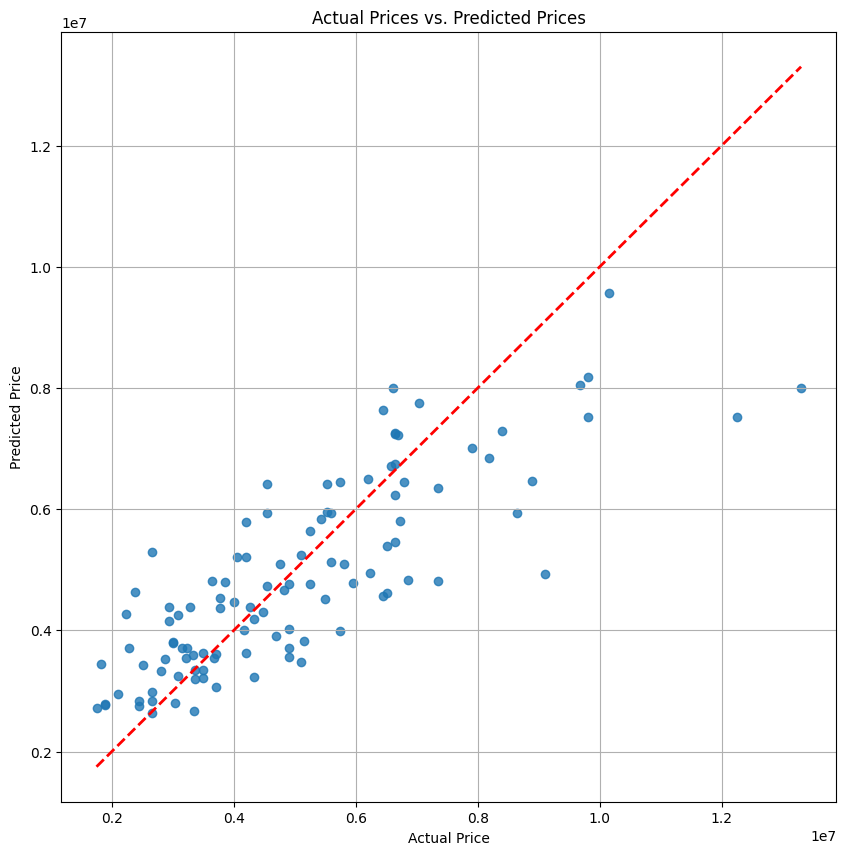

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Prices')
plt.grid(True)
plt.show()

In [ ]:
df = pd.DataFrame(df)

# Select the top 5 rows for prediction/fitting
df_top5 = df.head(5)
# Prepare data (X must be 2D)
X_train = df_top5[['area', 'bedrooms','bathrooms','stories','basement','guestroom']]
y_train = df_top5['price']


# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the same top 5 rows
predictions = model.predict(X_train)

# Display results
df_top5 = df_top5.copy()
df_top5['Predicted'] = predictions
print(df_top5)

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus     Predicted  
0                 2  1.330000e+07  
1                 2  1.225000e+07  
2                 1  1.225000e+07  
3             

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

# Make predictions on the validation set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("R2 Score:", r2_score(y_test,y_pred))
print("Root Mean Squared Error:", root_mean_squared_error(y_test,y_pred))

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train, y_train) # Corrected Y_train to y_train
Y_pred = model_SVR.predict(X_test) # Corrected X_valid to X_test

print(f'Mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, Y_pred)}') # Corrected Y_valid to y_test and added f-string

from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train) # Corrected Y_train to y_train
Y_pred = model_RFR.predict(X_test) # Corrected X_valid to X_test

print(f'Mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, Y_pred)}') # Corrected Y_valid to y_test and added f-string

Mean Absolute Error: 979679.6912959901
Mean Squared Error: 1771751116594.0352
R2 Score: 0.6494754192267803
Root Mean Squared Error: 1331071.4167895108
Mean_absolute_percentage_error: 0.3671300627421114
Mean_absolute_percentage_error: 0.21820518613007484


In [ ]:
#Predict for new house
# Assuming default values (0) for basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus if not specified
# The order of features should match X: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
NewHOUSE_data = [[6500, 3, 2, 4, 1, 1, 0, 0, 0, 0, 0, 0]]
# Create a DataFrame with feature names for prediction
NewHOUSE_df = pd.DataFrame(NewHOUSE_data, columns=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'])
prediction=model.predict(NewHOUSE_df)
print("Predicted House Price:",prediction)

Predicted House Price: [6060127.47455974]


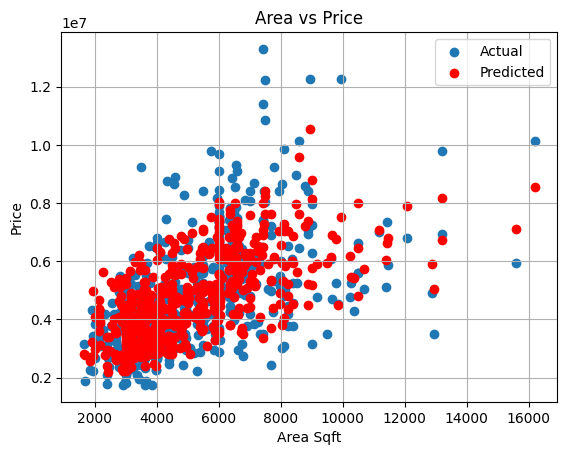

In [ ]:
#Visualisation
import matplotlib.pyplot as plt

plt.scatter(df['area'],df['price'],label="Actual")
plt.scatter(df['area'],model.predict(X),color='red',label="Predicted")
plt.xlabel('Area Sqft')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.grid(True)
plt.legend()
plt.show()